<a href="https://colab.research.google.com/github/inyunita/world-life-expectation-analysis/blob/main/world_life_expectancy_Data_preparation_and_initial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WORLD LIFE EXPECTANCY


---

**INDAH YUNITA**

**GG3DAGP0191**

**DA-11**

**GENERASI GIGIH 3.O**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [ ]:
dataset_le_path = "/content/drive/MyDrive/Generasi Gigih/Task/Dataset/Life Expectancy Data.csv"

In [ ]:
df_life_expectancy = pd.read_csv(dataset_le_path)
df_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Melihat Masing-Masing Atribut apakah ada yang string nya tidak konsisten

In [ ]:
df_life_expectancy["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
df_life_expectancy["Year"].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [ ]:
df_life_expectancy["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

Tidak ada permasalahan dalam string

# Data Understanding

In [ ]:
df_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Standarisasi Format Nama Kolom

In [ ]:
df_life_expectancy.rename(columns={'infant deaths': 'Infant Deaths',
                   'percentage expenditure': 'Percentage Expenditure',
                   ' BMI ':'BMI',
                   'under-five deaths ': 'Under-Five Deaths',
                   ' HIV/AIDS' : 'HIV/AIDS',
                   ' thinness  1-19 years' : 'Thinness  1-19 Years',
                   ' thinness 5-9 years': 'Thinness 5-9 years'}

                   , inplace=True)
df_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Membersihkan kolom dari spasi di awal dan di akhir
df_life_expectancy = df_life_expectancy.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
df_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
print("Shape Data: ", df_life_expectancy.shape)

Shape Data:  (2938, 22)


# Check Null Value

In [ ]:
#Categoric Feature
categoric_feature = df_life_expectancy.select_dtypes(exclude=[np.number])
categoric_feature.describe().transpose()

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [ ]:
#null value in categorical column
categoric_feature.isnull().sum()

Country    0
Status     0
dtype: int64

Tidak ada null value di kolom kategorikal

In [ ]:
#numerical column
numerical_col = df_life_expectancy.select_dtypes(include=[np.number])
numerical_col.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
Percentage Expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-Five Deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [ ]:
#null value in categorical column
numerical_col.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 Years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Fill Null in Numerical Coloumn with Median

---
Data yang kosong diisi dengan median karena mempertimbangkan jika ada data-data yang outlier sehingga jika diisi dengan median akan lebih relevan dibandingkan diisi dengan mean


In [ ]:
numeric_cols = df_life_expectancy.select_dtypes(include='number').columns
df_life_expectancy[numeric_cols] = df_life_expectancy[numeric_cols].fillna(df_life_expectancy[numeric_cols].median())

In [ ]:
numerical_col = df_life_expectancy.select_dtypes(include=[np.number])
numerical_col.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 Years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Aggregation Function

In [ ]:
numerical_col.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.923472e+01,9.509115e+00,36.30000,63.200000,7.210000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647257e+02,1.240862e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
Infant Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.546875e+00,3.921946e+00,0.01000,1.092500,3.755000e+00,7.390000e+00,1.787000e+01
Percentage Expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.302212e+01,2.299698e+01,1.00000,82.000000,9.200000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.838118e+01,1.993537e+01,1.00000,19.400000,4.350000e+01,5.610000e+01,8.730000e+01
Under-Five Deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


# Duplicate Data

In [ ]:
#Cek data duplikat
df_life_expectancy[df_life_expectancy.duplicated()].shape

(0, 22)

Tidak ada data yang duplikat

# Persebaran Data

Numerical_col masih dalam bentuk dataframe, sehingga harus diubah ke dalam bentuk list terlebih dahulu nama kolomnya supaya mudah divisualisasikan


In [ ]:
numerical_col

,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
col_numeric_feature = numerical_col.columns.tolist()
col_numeric_feature

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles ',
 'BMI',
 'Under-Five Deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 Years',
 'Thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

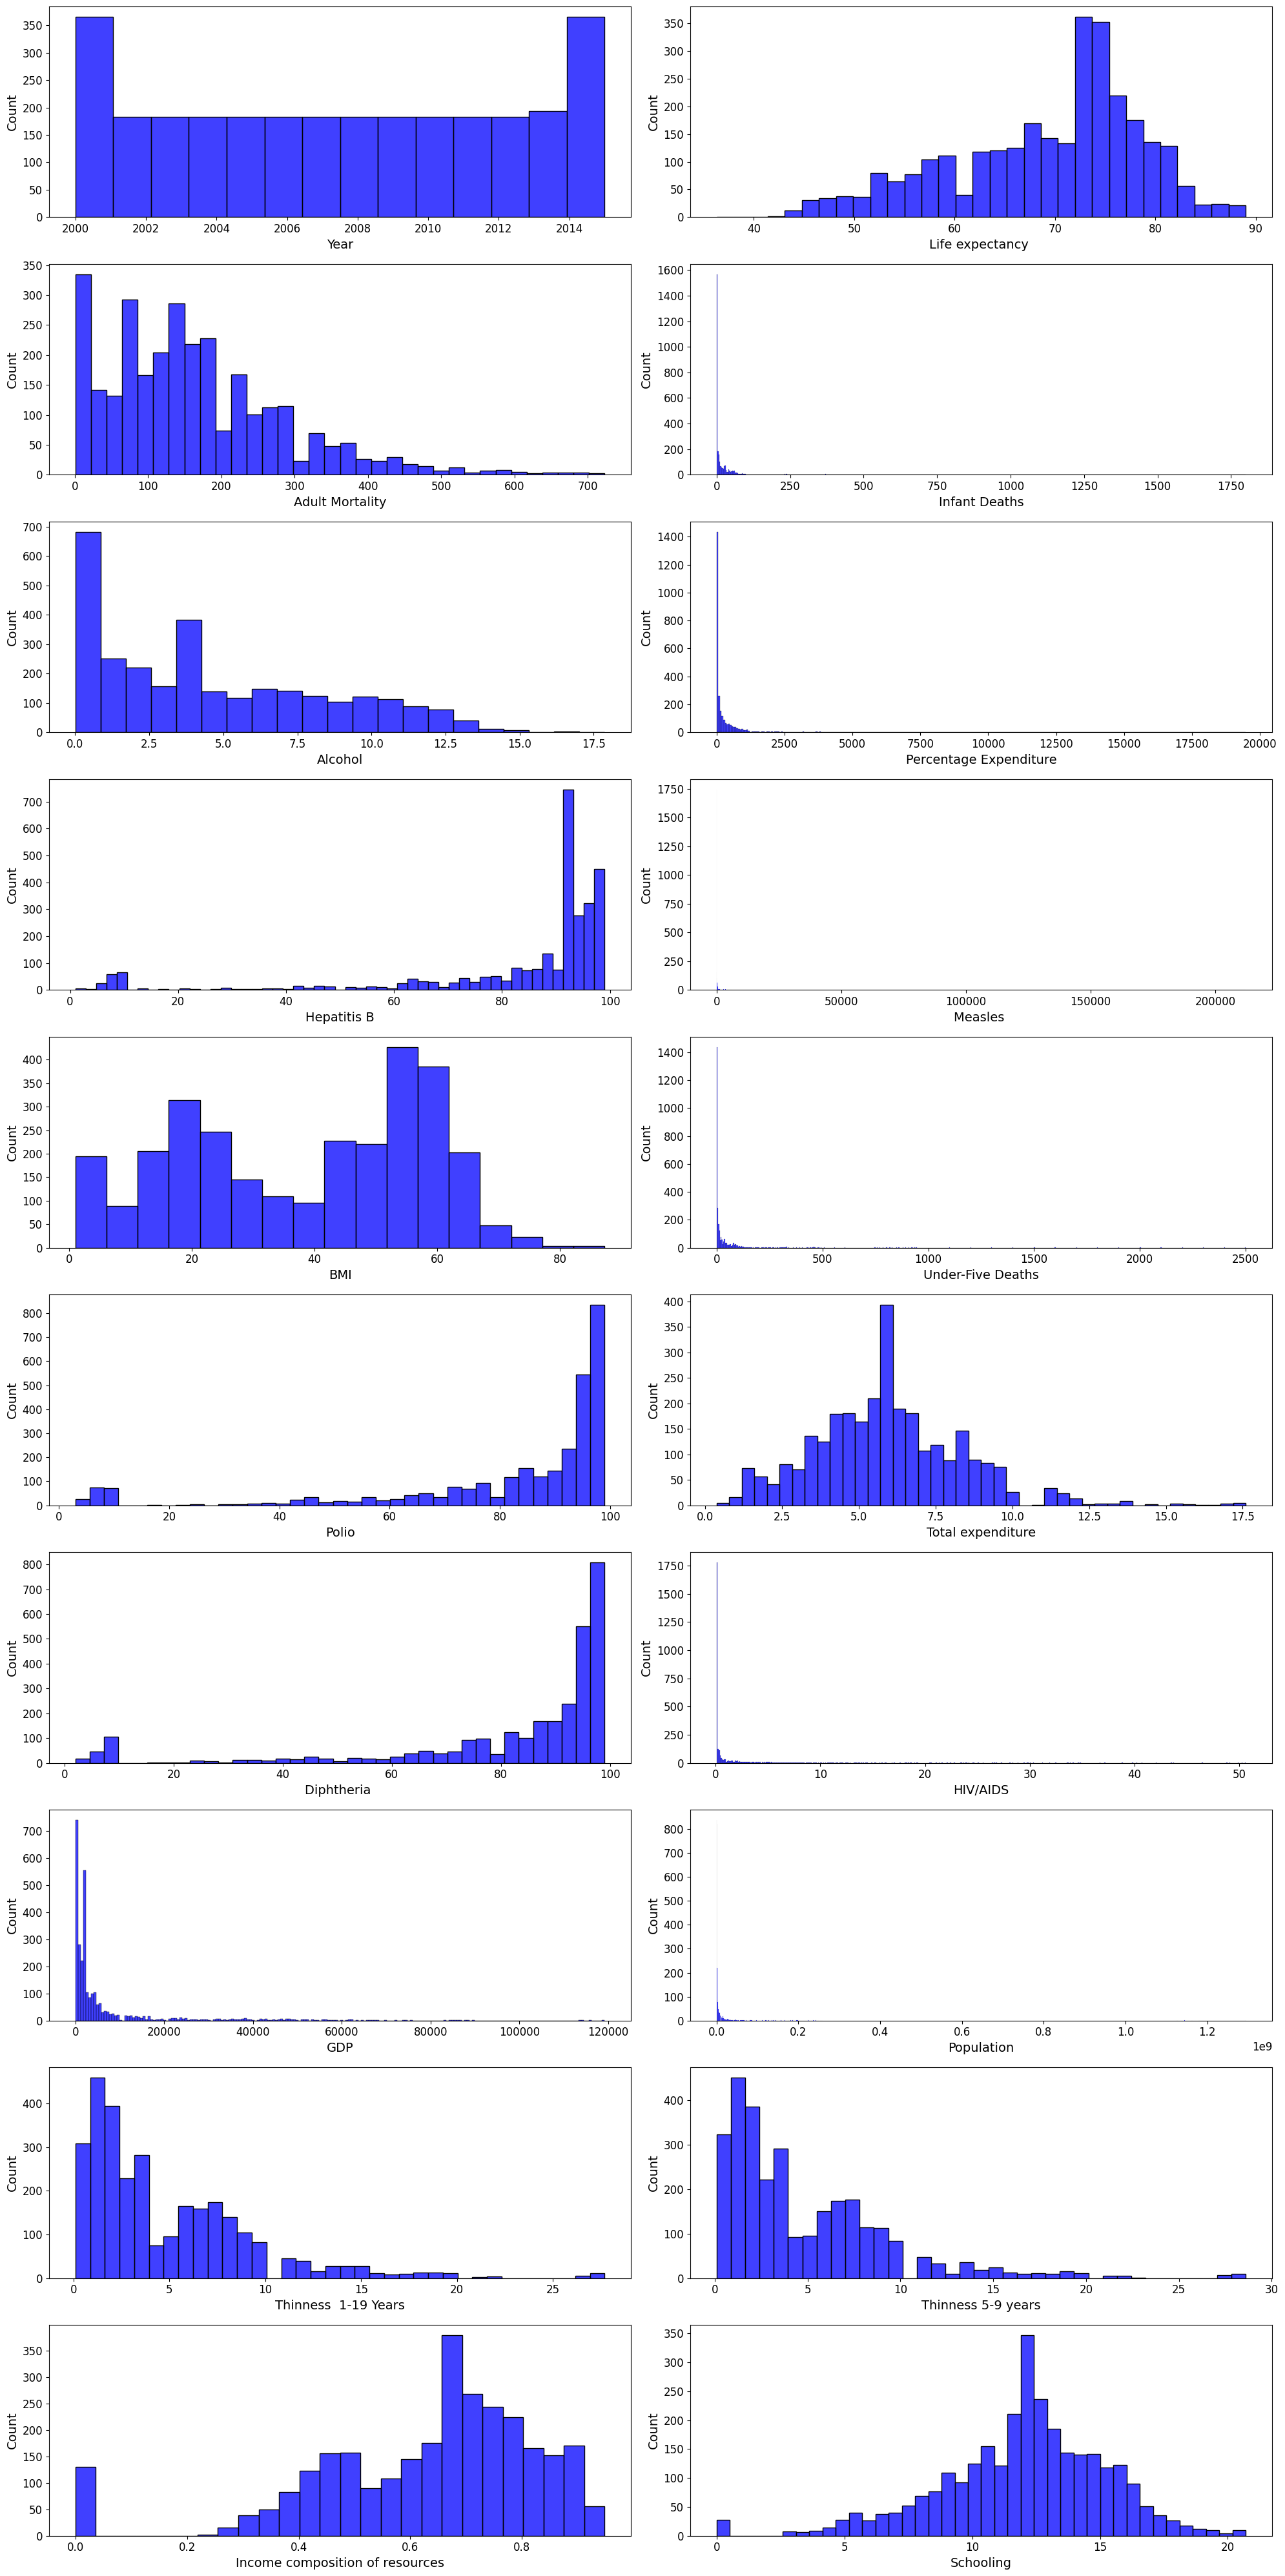

In [ ]:
#figure size
plt.figure(figsize=(20,40))
#ukuran font sumbu x dan y
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
#loop masing-masing visualisasi atribut
for i in range(0, len(col_numeric_feature)):
    plt.subplot(10, 2, i+1)
    sns.histplot(x=df_life_expectancy[col_numeric_feature[i]], color='blue')
    plt.xlabel(col_numeric_feature[i])
    plt.tight_layout()

Tidak ada data yang berdistribusi normal

# Outlier

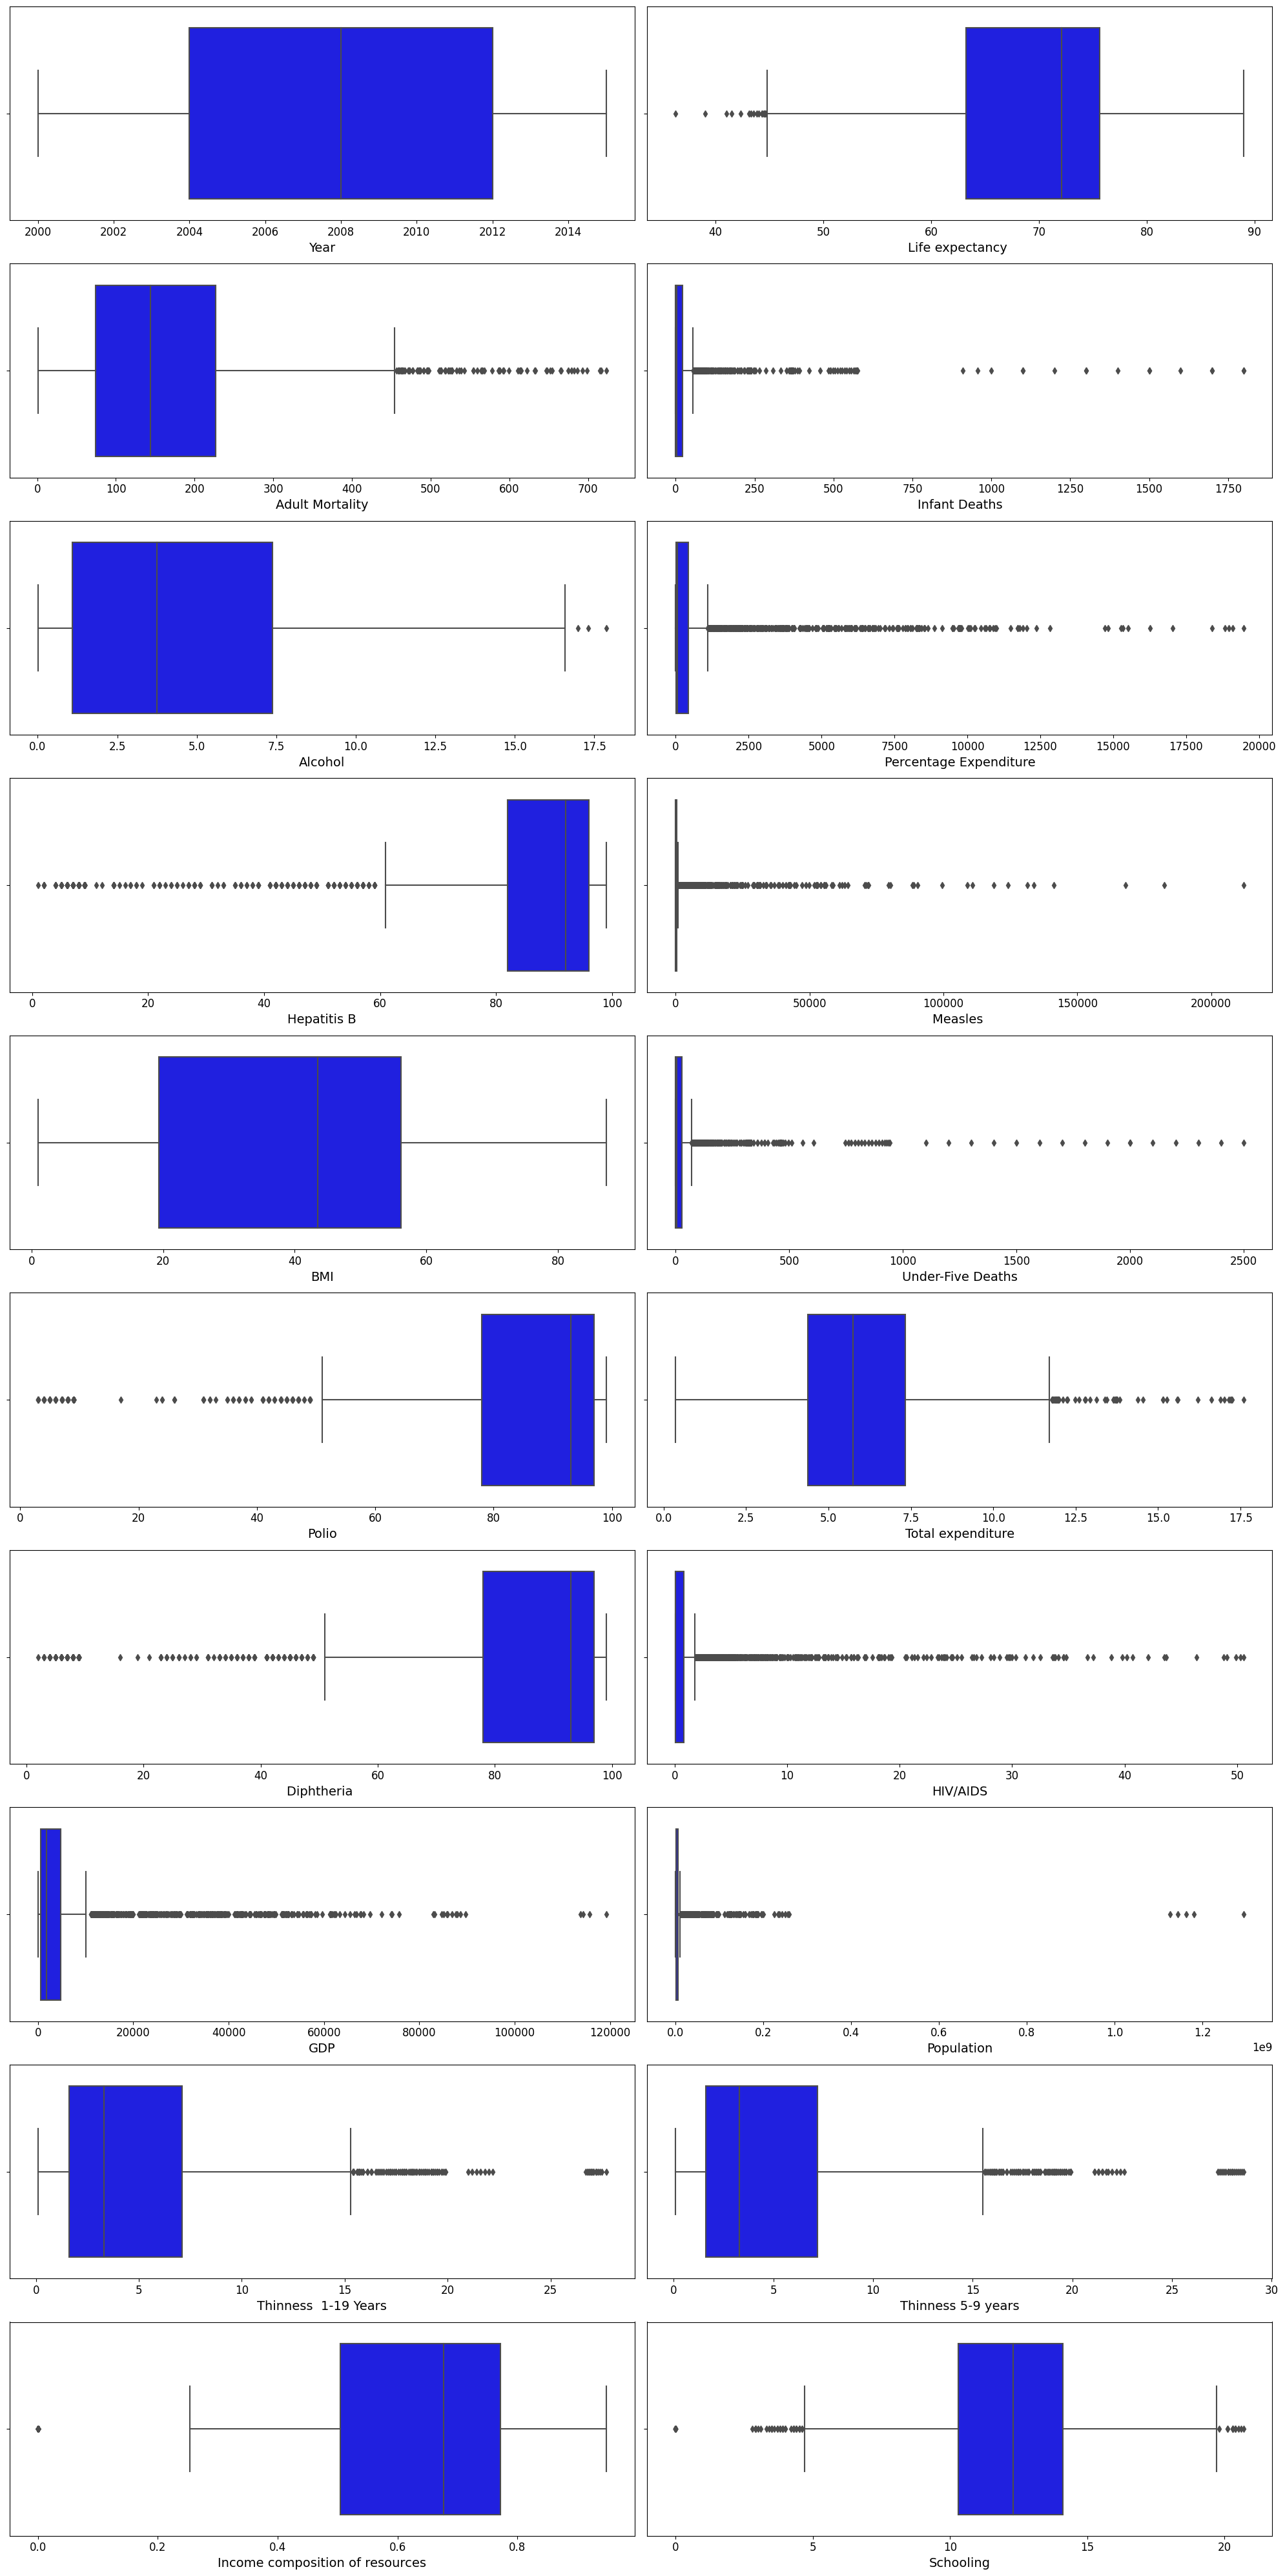

In [ ]:
#figure size
plt.figure(figsize=(20,40))
#ukuran font sumbu x dan y
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
for i in range(0, len(col_numeric_feature)):
    plt.subplot(10, 2, i+1)
    sns.boxplot(x=df_life_expectancy[col_numeric_feature[i]], color='blue')
    plt.xlabel(col_numeric_feature[i])
    plt.tight_layout()

Outlier tidak dihilangkan agar tidak mempengaruhi analisis data. Untuk kasus analisis ini memang sebaiknya outlier dibiarkan saja.

# Visualisasi Data

Ambil data dari natural earth untuk membuat bentuk map

In [ ]:
# Ambil data peta dunia dari geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-25-5d919b1dad03>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### Life Expectancy In Each Country

<ipython-input-27-be61d76fd1ec>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


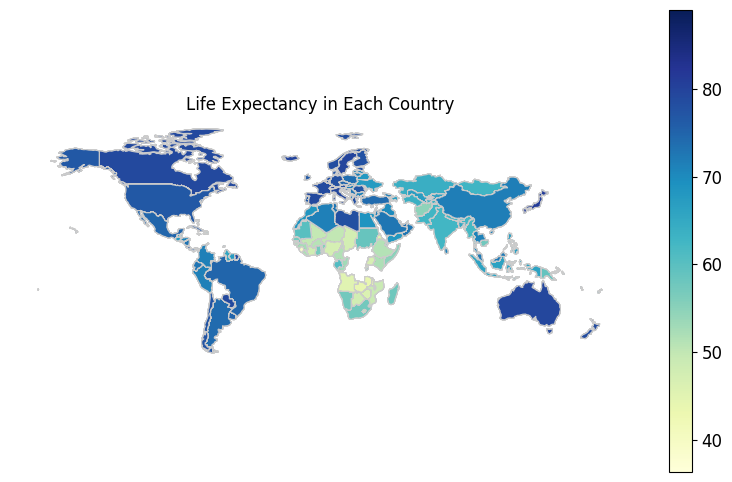

In [ ]:
# Ambil data peta dunia dari geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data bersih dari DataFrame dengan data peta dunia berdasarkan kolom yang sesuai ('country')
# Gabungkan data bersih dari DataFrame dengan data peta dunia berdasarkan kolom yang sesuai
merged_data = world.merge(df_life_expectancy, left_on='name', right_on='Country')

# Membuat peta menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='Life expectancy ', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Menambahkan judul pada peta
ax.set_title('Life Expectancy in Each Country')

# Menghilangkan axis
ax.set_axis_off()

# Menampilkan peta
plt.show()

# Boxplot Perbandingan Life Expectancy di Negara Maju dan Berkembang

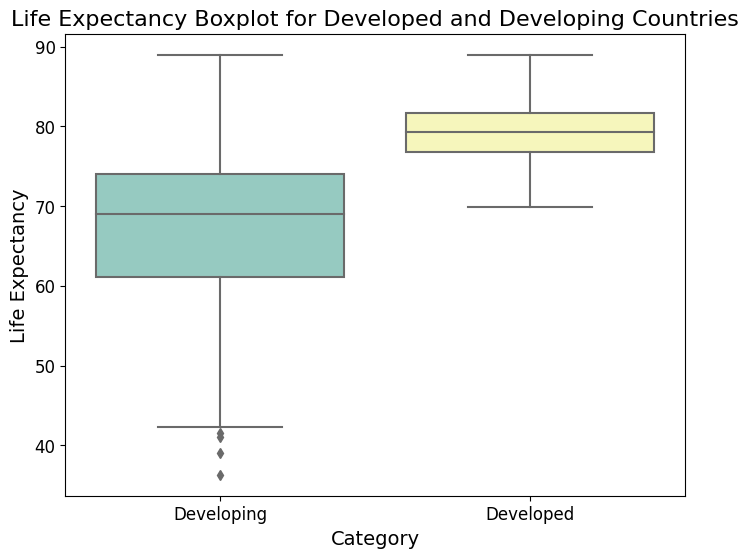

In [ ]:
# Plot boxplot untuk life expectancy pada kategori "developed" dan "developing"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df_life_expectancy, palette='Set3')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.title('Life Expectancy Boxplot for Developed and Developing Countries', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Q1 (25% data pengamatan lebih kecil atau sama dengan nilai Q1)

Q2 (median, 50% data pengamatan lebih kecil atau sama dengan nilai ini)

Q3 (75% data pengamatan lebih kecil atau sama dengan nilai ini )

Developing Country:

Q1 : +- 42

Q2 : 69

Q3: 89

Developed Country:

Q1 : 70

Q2 : 80

Q3: 89

# Mulltivariate Analysis

Indikator apa yang paling mempengaruhi life expectancy di suatu negara?

Karena data tidak berdistribusi normal, maka korelasi yang digunakan adalah korelasi spearman

<ipython-input-29-4e547979d1f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_life_expectancy.corr(method='spearman')


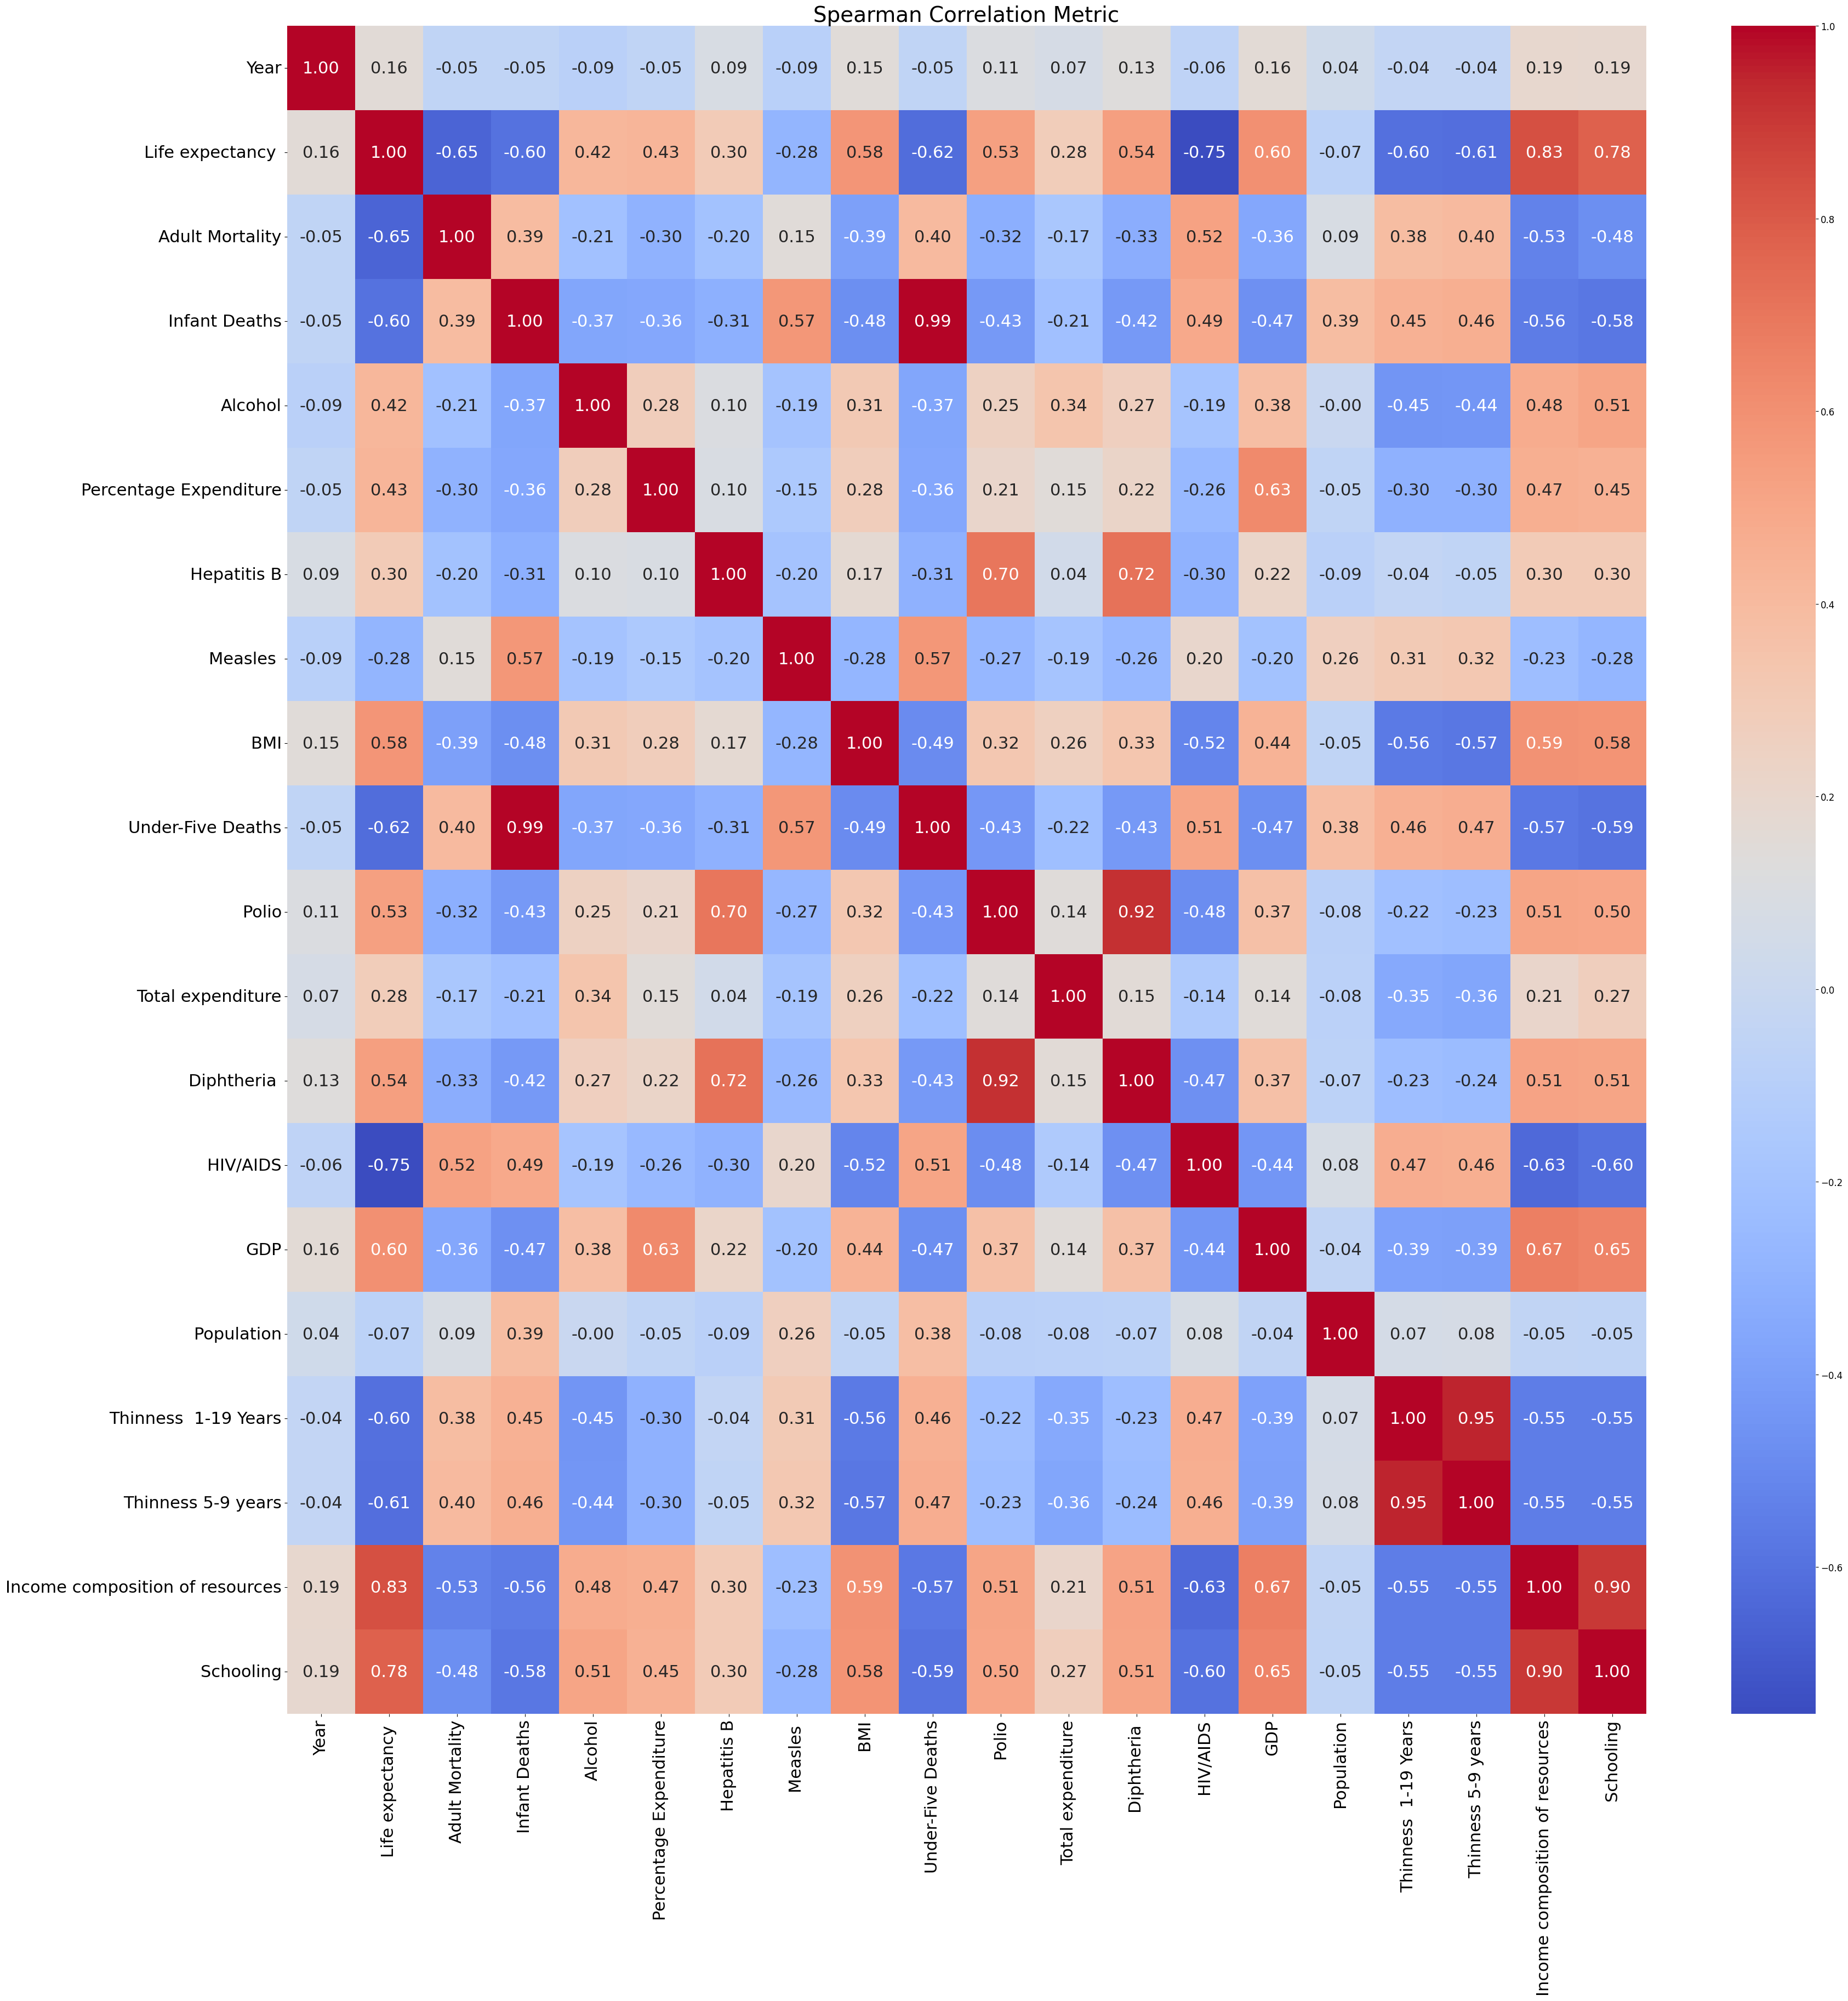

In [ ]:
# Menghitung matriks korelasi dengan metode Spearman
correlation_matrix = df_life_expectancy.corr(method='spearman')

# Plot heatmap untuk matriks korelasi
plt.figure(figsize=(40, 40))
#ukuran font sumbu x dan y
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 22})
plt.title('Spearman Correlation Metric', fontsize=28)  # Ukuran judul lebih besar
plt.xticks(fontsize=22)  # Ukuran label sumbu x lebih besar
plt.yticks(fontsize=22)  # Ukuran label sumbu y lebih besar
plt.show()

Berdasarkan hasil uji korelasi spearman, faktor yang paling mempengaruhi nilai life expectancy adalah Income Composition of Resource dengan nilai 0.83, nilainya positif dan paling besar diantara variabel lainnya. Artinya Income composition of resource memiliki hubungan positif dengan life expectancy, jika Income Composition of Resource meningkat maka life expectancy juga meningkat.

 Income Composition of Resource adalah indeks yang mencakup beberapa fitur lainnya. Ini memiliki informasi tentang harapan hidup yang sedang diprediksi. komposisi pendapatan sumber daya sebagai "Indeks Pembangunan Manusia (IPM) adalah indeks komposit statistik harapan hidup, pendidikan, dan indikator pendapatan per kapita, yang digunakan untuk menentukan peringkat negara menjadi empat tingkatan pembangunan manusia. Sebuah negara mendapat nilai IPM yang lebih tinggi ketika umurnya lebih tinggi, tingkat pendidikannya lebih tinggi, dan pendapatan nasional bruto GNI (PPP) per kapita lebih tinggi.

Variabel lain yang juga mempengaruhi life expectancy adalah schooling dan GPD. Keduanya berkorelasi positif dengan life expectancy. Artinya, semakin tinggi pendidikan dan GDP masyarakatnya, maka life expectancy suatu negara juga semakin besar

#Perbandingan Developed dan Developing Country Dari Sisi 3 Faktor Utama Pendukung Life Expectancy

### Income Composition of Resources

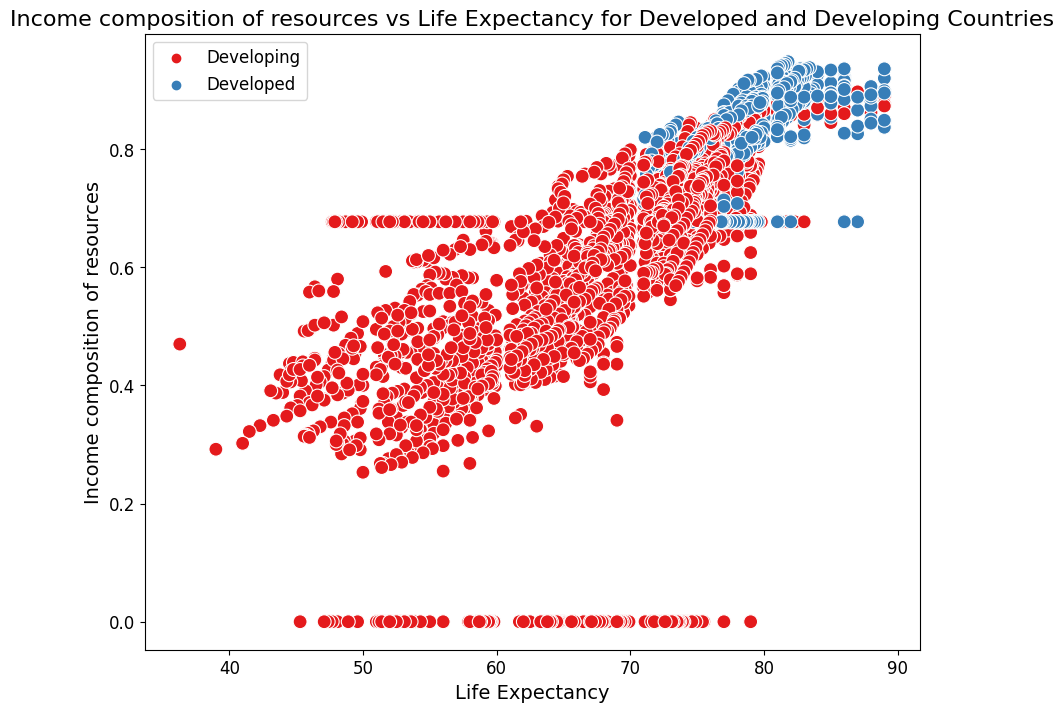

In [ ]:
 # Plot scatter plot untuk Income composition of resources vs life expectancy pada kategori "developed" dan "developing"
plt.figure(figsize=(10, 8))
sns.scatterplot(x= 'Life expectancy ', y='Income composition of resources', hue='Status', data=df_life_expectancy, palette='Set1', s=100)
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Income composition of resources', fontsize=14)
plt.title('Income composition of resources vs Life Expectancy for Developed and Developing Countries', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Developed Country cenderung memiliki Income Composition dan life expectancy yang tinggi jika dibandingkan dengan Developing country. Namun juga ada developing country di tahun tertentu yang memiliki ICR rendah namun life expectancynya tergolong tingggi

Negara mana saja?

In [ ]:
df_life_expectancy[(df_life_expectancy["Income composition of resources"] < 0.2) & (df_life_expectancy["Life expectancy "] > 70) & (df_life_expectancy["Status"]=="Developing")]

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 years,Income composition of resources,Schooling
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.938950,1386542.0,3.5,3.4,0.0,0.0
75,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.28,22.862952,97.0,0,...,97.0,4.21,97.0,0.1,1352.837400,1386542.0,3.5,3.4,0.0,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,99.0,0,...,99.0,4.53,99.0,0.1,9739.825560,1386542.0,3.5,3.5,0.0,0.0
77,Antigua and Barbuda,2002,Developing,74.0,153.0,0,7.21,927.407585,99.0,0,...,93.0,4.41,98.0,0.1,9386.716452,1386542.0,3.6,3.5,0.0,0.0
78,Antigua and Barbuda,2001,Developing,73.8,154.0,0,7.51,163.767698,96.0,0,...,99.0,4.48,97.0,0.1,9358.154162,1386542.0,3.6,3.5,0.0,0.0
79,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,92.0,0,...,96.0,4.13,95.0,0.1,9875.161736,1386542.0,3.7,3.6,0.0,0.0
175,Bahamas,2000,Developing,72.6,192.0,0,12.15,0.000000,92.0,0,...,91.0,5.21,99.0,0.1,1766.947595,1386542.0,2.7,2.6,0.0,12.0
330,Bosnia and Herzegovina,2005,Developing,75.0,12.0,0,4.56,45.713543,93.0,23,...,95.0,8.50,93.0,0.1,2968.411860,378153.0,2.9,2.9,0.0,12.5
331,Bosnia and Herzegovina,2004,Developing,75.5,99.0,0,4.25,3.479919,36.0,28,...,87.0,9.40,84.0,0.1,265.642661,3781287.0,3.0,3.0,0.0,12.3
332,Bosnia and Herzegovina,2003,Developing,75.2,12.0,0,4.14,39.865180,92.0,18,...,87.0,7.94,87.0,0.1,2214.732246,3779247.0,3.0,3.0,0.0,12.1


### Schooling

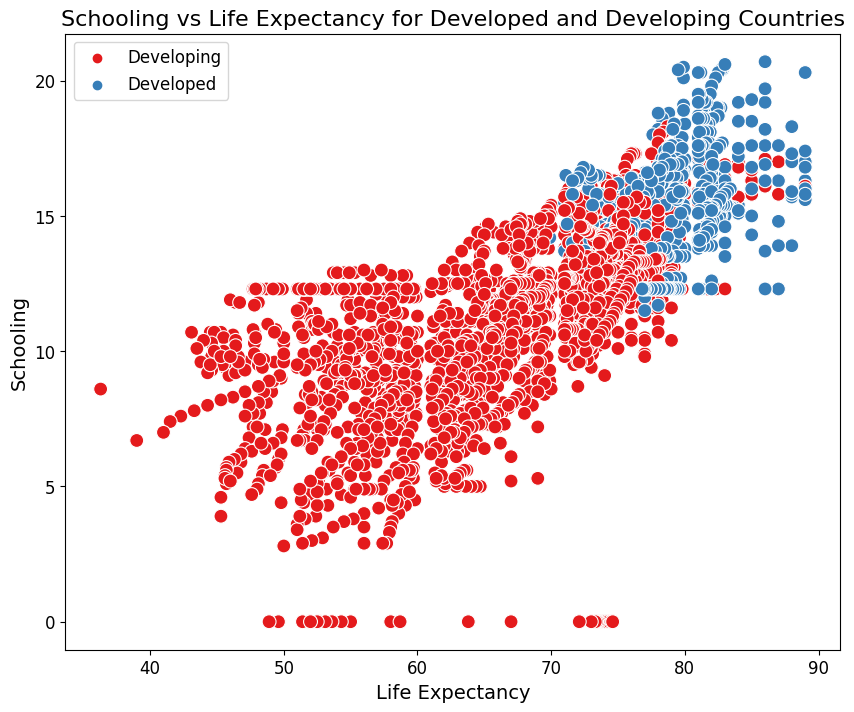

In [ ]:
 # Plot scatter plot untuk Schooling vs life expectancy pada kategori "developed" dan "developing"
plt.figure(figsize=(10, 8))
sns.scatterplot(x= 'Life expectancy ', y='Schooling', hue='Status', data=df_life_expectancy, palette='Set1', s=100)
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Schooling', fontsize=14)
plt.title('Schooling vs Life Expectancy for Developed and Developing Countries', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Tingkat pendidikan di developed country yang cenderung tinggi mempengaruhi tingginya life Expectancy. Sedangkan pada developing country ternyata ada beberapa data yang menunjukkan bahwa ada life expectancy yang tinggi walaupun tingkat pendidikannya rendah. Ada juga developing country yang tingkat pendidikan dan life expectancynya sama-sama tinggi

Negara Mana Saja?

In [ ]:
df_life_expectancy[(df_life_expectancy["Schooling"] < 5) & (df_life_expectancy["Life expectancy "] > 70) & (df_life_expectancy["Status"]=="Developing")]

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 years,Income composition of resources,Schooling
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.938950,1386542.0,3.5,3.4,0.000,0.0
75,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.28,22.862952,97.0,0,...,97.0,4.21,97.0,0.1,1352.837400,1386542.0,3.5,3.4,0.000,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,99.0,0,...,99.0,4.53,99.0,0.1,9739.825560,1386542.0,3.5,3.5,0.000,0.0
77,Antigua and Barbuda,2002,Developing,74.0,153.0,0,7.21,927.407585,99.0,0,...,93.0,4.41,98.0,0.1,9386.716452,1386542.0,3.6,3.5,0.000,0.0
78,Antigua and Barbuda,2001,Developing,73.8,154.0,0,7.51,163.767698,96.0,0,...,99.0,4.48,97.0,0.1,9358.154162,1386542.0,3.6,3.5,0.000,0.0
79,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,92.0,0,...,96.0,4.13,95.0,0.1,9875.161736,1386542.0,3.7,3.6,0.000,0.0
335,Bosnia and Herzegovina,2000,Developing,74.6,116.0,0,3.64,165.616864,92.0,43,...,87.0,7.90,85.0,0.1,1461.755200,376676.0,3.3,3.2,0.000,0.0
1650,Marshall Islands,2013,Developing,72.1,144.0,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,1386542.0,0.1,0.1,0.677,0.0
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,92.0,0,...,93.0,8.91,93.0,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,92.0,0,...,93.0,8.33,93.0,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0


### GDP

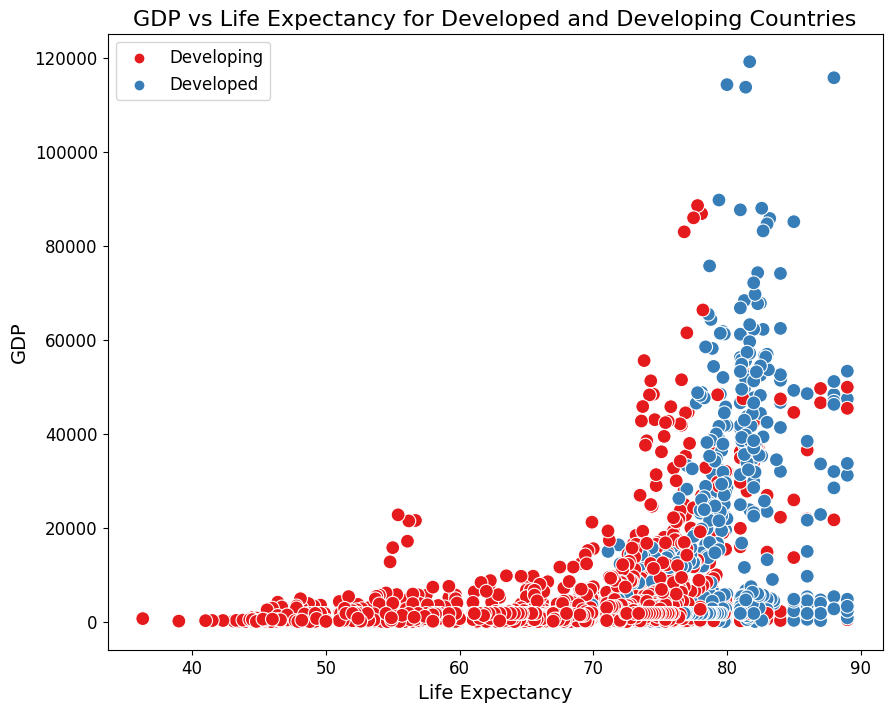

In [ ]:
 # Plot scatter plot untuk GDP vs life expectancy pada kategori "developed" dan "developing"
plt.figure(figsize=(10, 8))
sns.scatterplot(x= 'Life expectancy ', y='GDP', hue='Status', data=df_life_expectancy, palette='Set1', s=100)
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.title('GDP vs Life Expectancy for Developed and Developing Countries', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Developed Country cenderung memiliki GDP yang tinggi secara keseluruhan meskipun ada juga Developed country yang memiliki GDP rendah namun life expectancy nya tetap tinggi

Kesimpulan:
- Tiga faktor utama yang memengaruhi tingkat life expectancy suatu negara adalah Income Composition of Resource, Schooling (Tingkat pendidikan), dan GDP
- Developed Country cenderung memiliki Income Composition of Resource yang tinggi dibandingkan dengan Developing Country
- Tingkat pendidikan pada developed country juga cenderung lebih tinggi dibandingkan dengan developing country sehingga life expectancynya juga tinggi. Namun ternyata ada beberapa developing country di tahun tertentu yang memiliki tingkat pendidikan rendah tetapi life expectancynya masih tergolong tinggi
- Developed Country cenderung memiliki GDP yang lebih tinggi dibandingkan dengan Developed country. Namun beberapa Developed country yang GDP nya rendah ternyata juga masih bisa memiliki life expectancy yang tinggi.

# Save Cleaned Data to CSV

In [ ]:
# Path ke folder di Google Drive yang sudah di-mount
folder_path = '/content/drive/MyDrive/Generasi Gigih/Task/Dataset/'

# Nama file CSV yang ingin Anda simpan
file_name = 'life_expectancy_clean.csv'

# Menggabungkan folder path dan file name untuk mendapatkan path lengkap
file_path = folder_path + file_name

# Simpan DataFrame sebagai file CSV ke path di Google Drive
df_life_expectancy.to_csv(file_path, index=False)

# HTML

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/GenerasiGigih/Task/GG3-DA-GP-0191-MIDTERM-TEST-FILE-1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/GenerasiGigih/Task/GG3-DA-GP-0191-MIDTERM-TEST-FILE-1.ipynb to html
[NbConvertApp] Writing 3638910 bytes to /content/drive/MyDrive/GenerasiGigih/Task/GG3-DA-GP-0191-MIDTERM-TEST-FILE-1.html
